In [1]:
from droplet_growth import mic, register, segment, poisson, fit
import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
import tifffile as tf
from glob import glob
import pandas as pd
from nd2tif.transform import to_8bits
import re
import seaborn as sns
%load_ext autoreload
%autoreload 2

In [12]:
path5 = "/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/*ng*aligned.tif"
path9 = "/home/aaristov/Multicell1/Lena/Data/20210209-MIC-load/*P.tif"
path10 = "/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/*aligned.tif"
path17 = "/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/*P.tif"
path18 = "/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/*aligned.tif"

In [3]:
paths5 = glob(path5)
paths5

['/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/2ng-scan2D-BF-WFtritctif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc001tif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/0ng-scan2D-BF-WFtritc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/5ng-scan2D-BF-WFtritctif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/0ng-scan2D-BF-WFtritctif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/4ng-scan2D-BF-WFtritc001tif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc001tiftif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/5ng-scan2D-BF-WFtritc-after-washtif.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/6ng-scan2D-BF-WFtritc-fitctif.aligned.tif',
 '/home/aaristov/M

In [13]:
paths10 = glob(path10)
paths10

['/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/8ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/7ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/10ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/5ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/6ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/0ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/2ng-scan2D-BF-WFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210210-MIC-overnight/tifs/4ng-scan2D-BF-WFtritc-fitc.aligned.tif']

In [14]:
paths18 = glob(path18)
paths18

['/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/8ng-scan2D-BF-CFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/4ng-scan2D-BF-CFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/6ng-scan2D-BF-CFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/12ng-scan2D-BF-CFtritc-fitc002.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/8ng-scan2D-BF-CFtritc-fitc001.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/0ng-scan2D-BF-CFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/20ng-scan2D-BF-CFtritc-fitc005.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/2ng-scan2D-BF-CFtritc-fitc.aligned.tif',
 '/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/10ng-scan2D-BF-CFtritc-fitc001.aligned.tif',
 '/home/aaristov/Multi

In [10]:
p = Pool(processes=11)

/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/16ng-scan2D-BF-CFtritc-fitc004.aligned.tif
(3, 6544, 21152)
(6544, 21152)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/6ng-scan2D-BF-CFtritc-fitc.aligned.tif
(3, 6544, 21152)
(6544, 21152)
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/0ng-scan2D-BF-CFtritc-fitc.aligned.tif
(3, 6544, 21152)/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/8ng-scan2D-BF-CFtritc-fitc.aligned.tif

(6544, 21152)(3, 6544, 21152)

(6544, 21152)/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/20ng-scan2D-BF-CFtritc-fitc005.aligned.tif
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/2ng-scan2D-BF-CFtritc-fitc.aligned.tif
/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/14ng-scan2D-BF-CFtritc-fitc003.aligned.tif
(3, 6544, 21152)

(3, 6544, 21152)
(6544, 21152)
(3, 6544, 21152)
(6544, 21152)/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/1

In [5]:
df5 = pd.concat(p.map(mic.get_intensities, paths5), ignore_index=True)

In [15]:
df18 = pd.concat(p.map(mic.get_intensities, paths18), ignore_index=True)

In [17]:
df18.to_csv("/home/aaristov/Multicell1/Lena/Data/20210218-MIC-overnight/tifs/intensities.csv")

In [3]:
df18 = pd.read_csv("/home/aaristov/Multicell/Lena/Data/20210218-MIC-overnight/tifs/intensities.csv")

In [10]:
df5

label  mean_intensity  max_intensity  ng
0         1       -2.353662             19   2
1         2       -7.005503             17   2
2         3      -16.252304              6   2
3         4       -4.731196             17   2
4         5       -3.027148             21   2
...     ...             ...            ...  ..
5005    497      172.859390          11737  12
5006    498      250.804077           1881  12
5007    499      -41.437481            -11  12
5008    500      -33.152840             -8  12
5009    501      224.456299           8170  12

[5010 rows x 4 columns]

In [11]:
df10 = pd.concat(p.map(mic.get_intensities, paths10), ignore_index=True)

In [18]:
p.close()

In [13]:
df10

label  mean_intensity  max_intensity  ng
0         1       -7.729454             36   8
1         2       20.637825           3057   8
2         3        8.814824             47   8
3         4      -18.145214            348   8
4         5       -3.596832            171   8
...     ...             ...            ...  ..
4003    497      373.526031          11434   4
4004    498       22.928452           1553   4
4005    499      224.714310           9507   4
4006    500       10.394844            351   4
4007    501      206.344086           5532   4

[4008 rows x 4 columns]

In [4]:
df18

Unnamed: 0  label  mean_intensity  max_intensity  ng
0              0      1       -0.002231             32   8
1              1      2       -0.232058             23   8
2              2      3        0.087074             40   8
3              3      4        0.233417             33   8
4              4      5       -0.137802             29   8
...          ...    ...             ...            ...  ..
6007        6007    497        0.687160             38  10
6008        6008    498       -0.062989             21  10
6009        6009    499       -0.240548             22  10
6010        6010    500        0.020550             29  10
6011        6011    501        0.120390             23  10

[6012 rows x 5 columns]

In [6]:
sns.swarmplot(x='ng', y='mean_intensity', data=df5.query('mean_intensity < 400'), size=1, )

NameError: name 'df5' is not defined

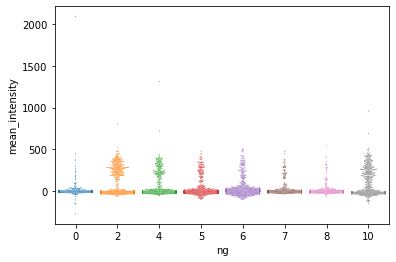

In [25]:
sns.swarmplot(x='ng', y='mean_intensity', data=df10, size=1, )

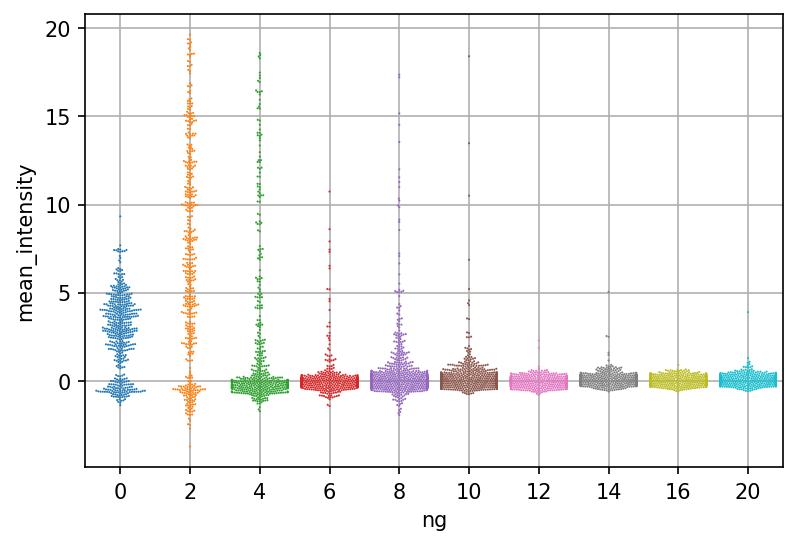

In [7]:
fig, ax = plt.subplots(dpi=150)
sns.swarmplot(x='ng', y='mean_intensity', data=df18.query('mean_intensity < 20'), size=1, ax=ax)
plt.grid()

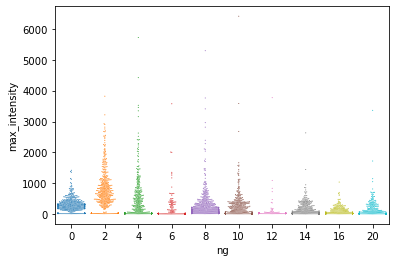

In [27]:
sns.swarmplot(x='ng', y='max_intensity', data=df18, size=1, )

In [10]:
df18.loc[:, 'positive'] = df18.mean_intensity > 1
df18.loc[:, 'negative'] = 1 - df18.positive

In [10]:
def count_cells(aligned_path:str, title='test', regex:str=r'(\d+)ng', max_count=10):
    bf, fluo, mask = tf.imread(aligned_path)
    n_cells = mic.get_cell_numbers(fluo, mask, threshold_abs=1.5)
    
    print('cells counted')
    df = pd.DataFrame(n_cells)
    try:
        ng = re.compile(regex).findall(aligned_path)[0]
        print (ng)
        df.loc[:,'ng'] = int(ng)
    except IndexError:
        print('concentration not found')
        ng=None
    l  = poisson.fit(df.query(f'n_cells < {max_count}').n_cells, title=f'{ng} ng')
    df.loc[:, 'poisson fit'] = l
        
#     if path:
#         well.save_tif(path.replace(*rename))
# #         imwrite(path.replace(*rename), stack)
#         df.to_csv(path.replace('Composite.tif', 'counts.csv'))
    return df

cells counted
10


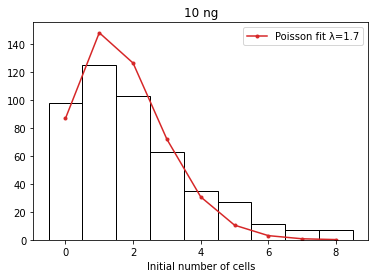

cells counted
6


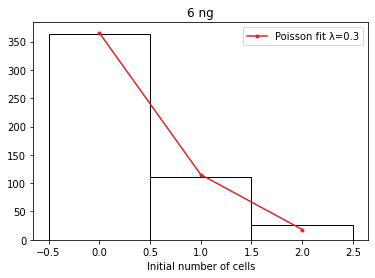

cells counted
2


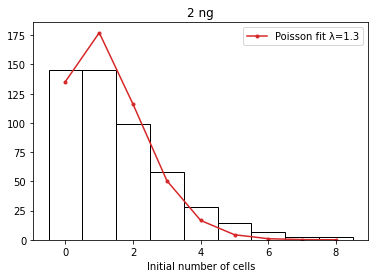

cells counted
20


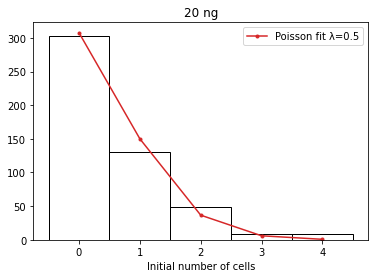

cells counted
8


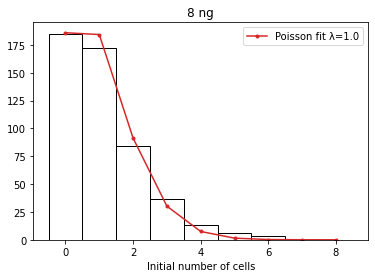

cells counted
12


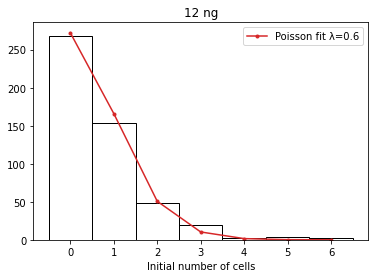

cells counted
0


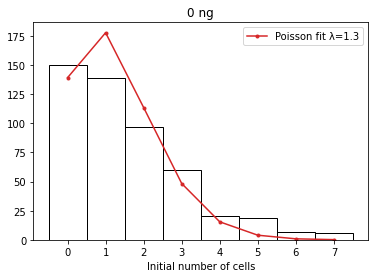

cells counted
4


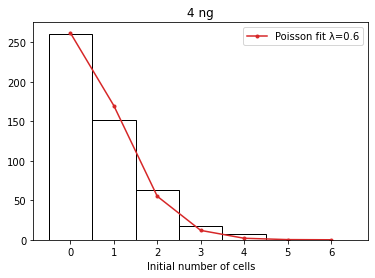

cells counted
16


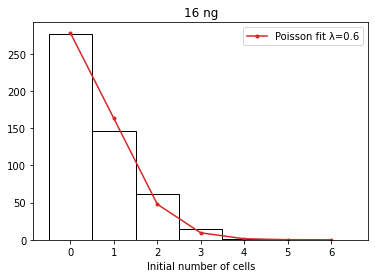

cells counted
14


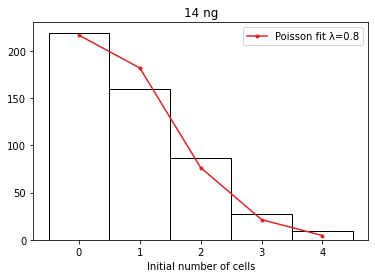

In [11]:
count_path = '/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/*MaxIP.aligned.tif'
count_paths = glob(count_path)
counts = list(map(count_cells, count_paths))
df_counts = pd.concat(counts, ignore_index=True)

In [156]:
df_counts

index            x             y  n_cells  ng  poisson fit
0         1   663.811609    416.729352        2  10     1.706808
1         2   664.953437    949.176531        1  10     1.706808
2         3   665.027521   1476.030946        3  10     1.706808
3         4   661.544611  16297.639109        8  10     1.706808
4         5   660.900634  16826.135524        2  10     1.706808
...     ...          ...           ...      ...  ..          ...
5005    497  5962.000000   4646.000000        0  14     0.839525
5006    498  5961.847513   5177.567060        0  14     0.839525
5007    499  5961.295918   5706.724968        0  14     0.839525
5008    500  5961.408642   6237.083846        0  14     0.839525
5009    501  5961.382560   6765.710278        1  14     0.839525

[5010 rows x 6 columns]

In [155]:
df_counts.to_csv('/home/aaristov/Multicell1/Lena/Data/20210217-MIC-load/cell_counts.csv')

In [6]:
df_counts = pd.read_csv('/home/aaristov/Multicell/Lena/Data/20210217-MIC-load/cell_counts.csv', index_col=0)

In [7]:
df_counts.groupby('ng').mean()

index            x             y   n_cells  poisson fit
ng                                                         
0   251.0  3311.317998  10475.033638  1.698603     1.277177
2   251.0  3311.317998  10475.033638  1.556886     1.308198
4   251.0  3311.317998  10475.033638  0.732535     0.648417
6   251.0  3311.317998  10475.033638  0.335329     0.315077
8   251.0  3311.317998  10475.033638  1.117764     0.991141
10  251.0  3311.317998  10475.033638  2.542914     1.706808
12  251.0  3311.317998  10475.033638  0.724551     0.609876
14  251.0  3311.317998  10475.033638  0.904192     0.839525
16  251.0  3311.317998  10475.033638  0.650699     0.586912
20  251.0  3311.317998  10475.033638  0.594810     0.487757

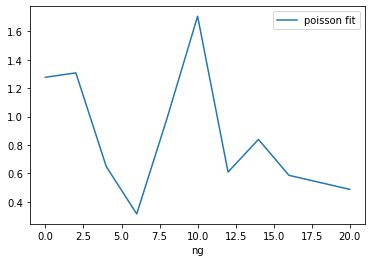

In [8]:
df_counts.groupby('ng').mean().plot( y='poisson fit')

Text(0.5, 1.0, 'feb 18 experiment raw counts')

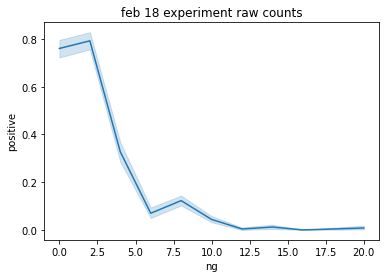

In [11]:
sns.lineplot(data=df18, x='ng', y='positive')
plt.title('feb 18 experiment raw counts')

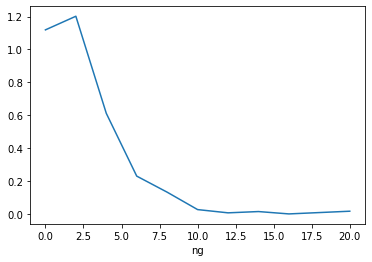

In [13]:
(calibrated_prob := -np.log(df18.groupby('ng').mean().loc[:, 'negative']) / df_counts.groupby('ng').mean().loc[:, 'poisson fit']).plot()

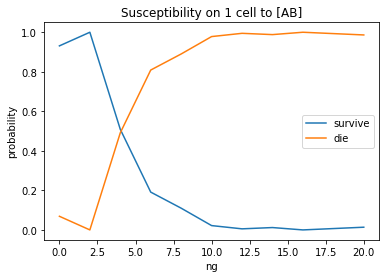

In [14]:
norm_prob = calibrated_prob / calibrated_prob.max()
norm_q = 1 - norm_prob
norm_prob.plot(label='survive')
norm_q.plot(label='die')
plt.ylabel('probability')
plt.title('Susceptibility on 1 cell to [AB]')
plt.legend()

Text(0, 0.5, 'probability to survive')

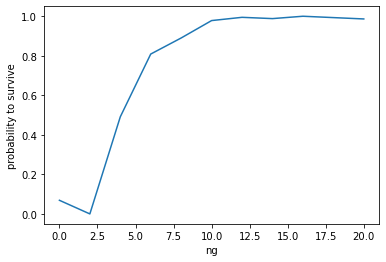

In [15]:
norm_q = 1 - norm_prob
norm_q.plot()
plt.ylabel('probability to survive')

In [172]:
norm_q.values

array([0.06894032, 0.        , 0.49116634, 0.8087478 , 0.89005067,
       0.97810845, 0.99454266, 0.98805861, 1.        , 0.98632523])

In [17]:
def sigmoid(x, a, b):
    return 1 / (1 + np.exp(a * x + b))

def hill(x, n, K):
    return x ** n/(x ** n + K)

def fit_sigmoid(probs, ax, fun=sigmoid, fit_name='sigmoid', p0=(2., -2.)):
    probs = probs.copy()
    vector = probs.index
#     print(vector)
#     probs.loc[:, 'negative'] = 1 - probs.positive
    popt, pcov = mic.fit.curve_fit(fun, vector, probs.values, p0=p0)
    a, b = popt
    da, db = np.sqrt(np.diag(pcov))
    probs.plot( ax=ax, label='experimental probability')
    ax.plot(vector, fun(vector, *popt), lw=10, alpha=.5, label=f'{fit_name} fit')
    plt.legend()
    return popt



array([  3.9600987 , 275.69453448])

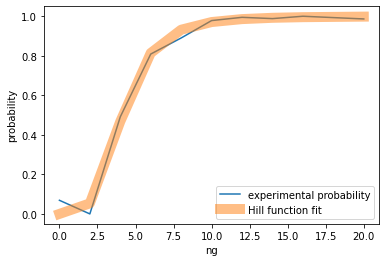

In [18]:
fig,ax = plt.subplots()
hopt = fit_sigmoid(norm_q, ax, hill, 'Hill function')
plt.ylabel('probability')
hopt

Text(0.5, 1.0, 'Hill gradient')

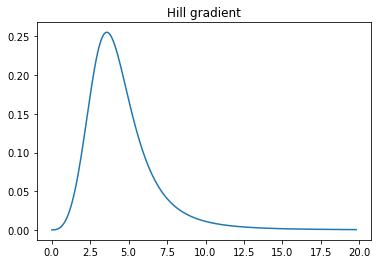

In [28]:
x = np.arange(0, norm_q.index.values.max(), .1)
H = hill(x, *hopt)
grad_x = x[1:] - x[:-1]
grad_y = H[1:] - H[:-1]
plt.plot(x[:-1], grad_y/grad_x)
plt.title('Hill gradient')

array([0.39919507, 4.31619018])

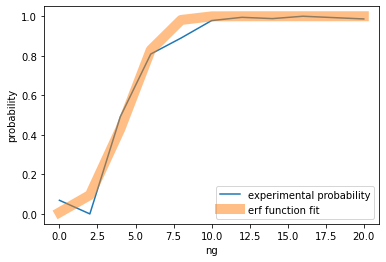

In [266]:
fig,ax = plt.subplots()
eopt = fit_sigmoid(norm_q, ax, erf_fun, 'erf function')
plt.ylabel('probability')
eopt

In [208]:
def get_concentration_from_hill_prob(prob_to_die, hill_params):
    
    n, A = hill_params
    q = prob_to_die
    return (A * q / (1 - q)) ** (1/n)

In [211]:
get_concentration_from_hill_prob(.999, hopt)

23.64294279015168

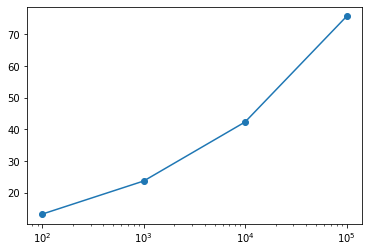

In [215]:
pp = np.array([.1 ** n for n in range(2,6)])
plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-')
plt.show()

In [64]:
petri_counts = pd.read_excel('MIC (count).xlsx', skiprows=3)
# petri_counts

In [91]:
petri_counts.pivot_table(values='MIC', index='Inoculum_size', columns='Seuil')

Seuil          50   150  250
Inoculum_size               
292.592593      11    9    7
317.037037      11    9    7
1462.962963     19   13   11
1585.185185     15   13   11
2925.925926     22   19   15
3170.370370     26   18   13
14629.629630    28   22   13
15851.851852    26   26   15
29259.259259    28   28   22
31703.703704    26   26   13
146296.296296   28   28   28
292592.592593   28   28   28
317037.037037   26   26   18

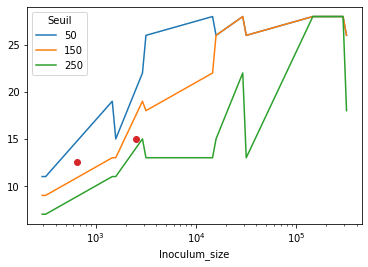

In [143]:
petri_counts.pivot_table(values='MIC', index='Inoculum_size', columns='Seuil').plot( logx=True)
plt.plot([650, 2500], [12.5, 15], 'o',)

prob_survive  lambda  prob_die5  prob_die
ng                                           
0            1.0       5        0.0  0.000000
2            1.0       5        0.0  0.000000
4            1.0       5        0.0  0.000000
8            0.2       5        0.8  0.956352
16           0.0       5        1.0  1.000000
32           0.0       5        1.0  1.000000

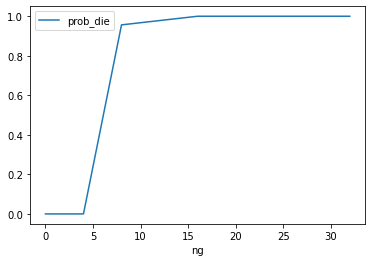

In [274]:
mic_chip_13_apr = pd.DataFrame(data={'prob_survive': [1, 1,1,.2, 0, 0], 'lambda': 5}, index=[0,2,4,8,16,32], )
mic_chip_13_apr.index.name='ng'
mic_chip_13_apr.loc[:,'prob_die5'] = 1 - mic_chip_13_apr.prob_survive
mic_chip_13_apr.loc[:,'prob_die'] = mic_chip_13_apr.prob_die5 ** (1/5)

mic_chip_13_apr.plot( y='prob_die')

mic_chip_13_apr

In [275]:
type(mic_chip_13_apr.prob_die)

pandas.core.series.Series

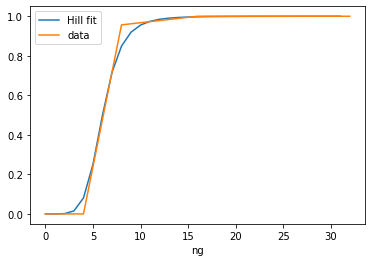

In [280]:
plt.plot((x := np.arange(mic_chip_13_apr.index.max())), hill(x, 6, 6 ** 6), label='Hill fit')
mic_chip_13_apr.prob_die.plot(label='data')
plt.legend()



In [204]:
get_concentration_from_hill_prob(.99, (5, 6.5 ** 5))

16.29447587387165

/home/aaristov/miniconda3/envs/nd2/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([7.776e+03, 5.000e+00])

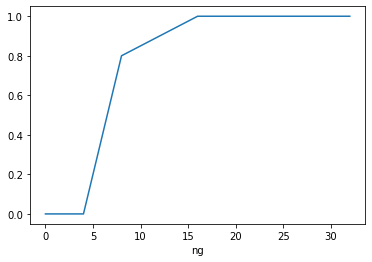

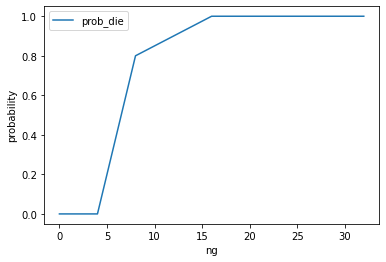

In [133]:
fig,ax = plt.subplots()
mic_chip_13_apr.plot( y='prob_die')
hopt = fit_sigmoid(mic_chip_13_apr.prob_die, ax, hill, fit_name='Hill function', p0=(6.**5,5.))
plt.ylabel('probability')
hopt

/home/aaristov/miniconda3/envs/nd2/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([7.776e+03, 5.000e+00])

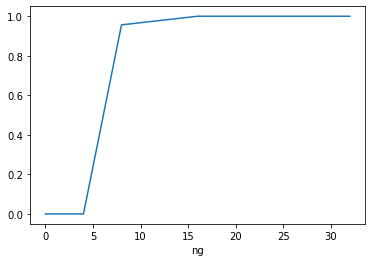

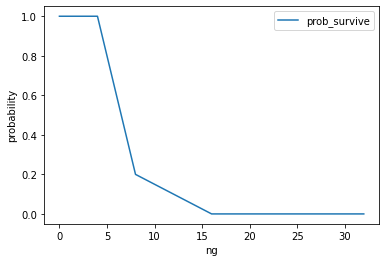

In [294]:
fig,ax = plt.subplots()
mic_chip_13_apr.plot( y='prob_survive')
hopt = fit_sigmoid(mic_chip_13_apr.prob_die, ax, hill, fit_name='Hill function', p0=(6.**5,5.))
plt.ylabel('probability')
hopt

In [229]:
from scipy.special import erf, erfinv

In [257]:
def erf_fun(x, a, b):
    return ((1 + erf(a * (x - b))) / 2)

def ierf_fun(y, a, b):
    return erfinv(2 * y - 1) / a + b

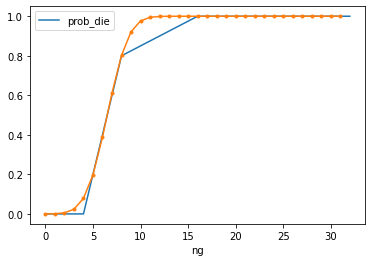

In [256]:

mic_chip_13_apr.plot( y='prob_die')
plt.plot((x := np.arange(32)), erf_fun(x, 0.4, 6.5), '.-')

In [260]:
ierf_fun(.99, 0.4, 6.5)

10.612440892832968

In [ ]:
sns.lineplot()

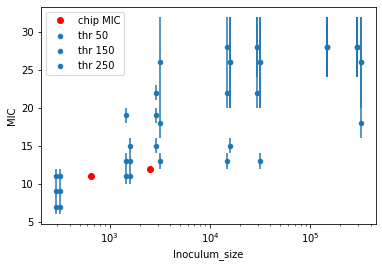

In [273]:
fig, ax = plt.subplots()
[petri_counts.query(f'Seuil == {thr}').plot(ax=ax, x='Inoculum_size', y='MIC', yerr='SD', kind='scatter', logx=True, label=f'thr {thr}') for thr in petri_counts.Seuil.unique() ]
plt.plot([650, 2500], [11, 12], 'ro', label='chip MIC')
plt.legend()
plt.show()

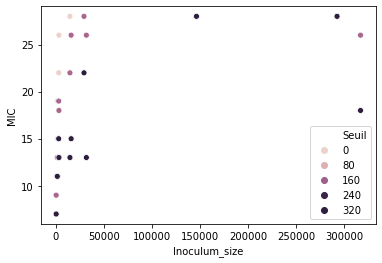

In [159]:
sns.scatterplot(data=petri_counts, x='Inoculum_size', y='MIC', hue='Seuil',)


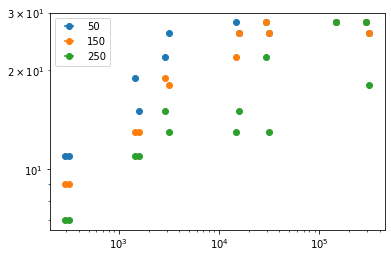

In [177]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar('Inoculum_size', 'MIC', None, 'SD', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.show()

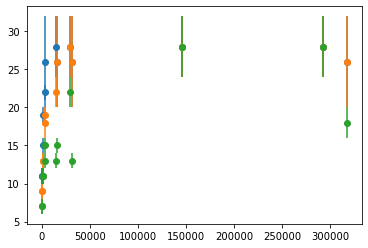

In [289]:
chip_mic=([650, 2500], [11, 12])

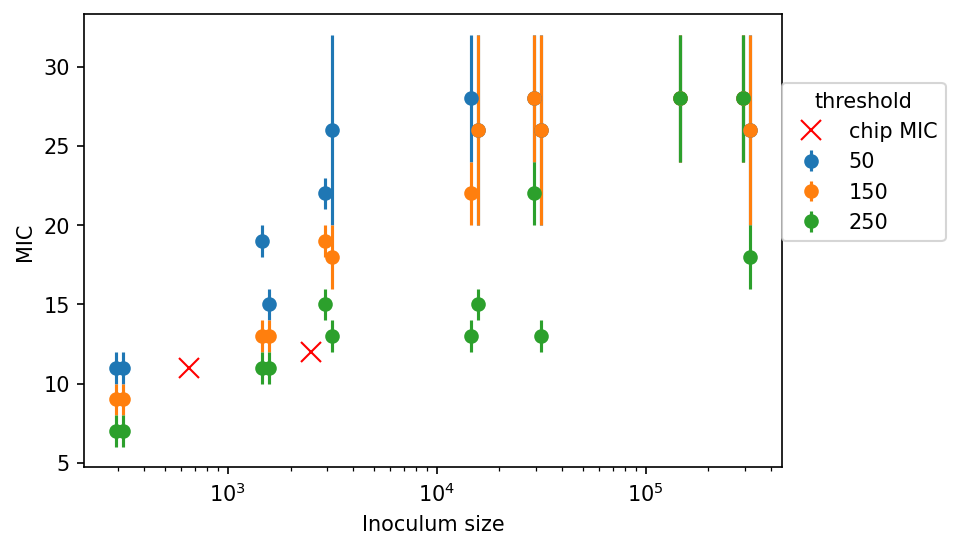

In [295]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
plt.figure(dpi=150)
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot(chip_mic[0], chip_mic[1], 'rx',ms=10, label='chip MIC')
# plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 1'), label='OD measurement 1')

# plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 2'), label='OD measurement 2')

plt.legend(title='threshold', loc=(1,.5))
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

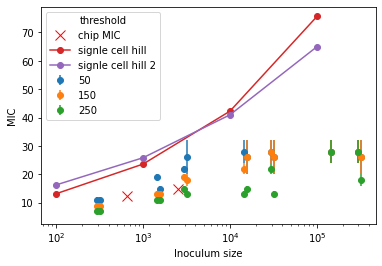

In [271]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
pp = np.array([.1 ** n for n in range(2,6)])
plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

pp = np.array([.1 ** n for n in range(2,6)])
plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'o-', label='signle cell sigmoid')

plt.legend(title='threshold')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

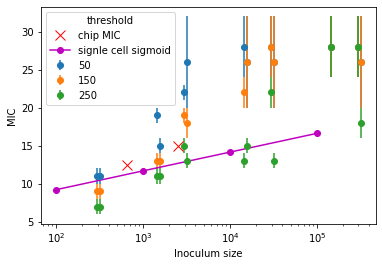

In [223]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
pp = np.array([.1 ** n for n in range(2,6)])
plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'mo-', label='signle cell sigmoid')

plt.legend(title='threshold')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

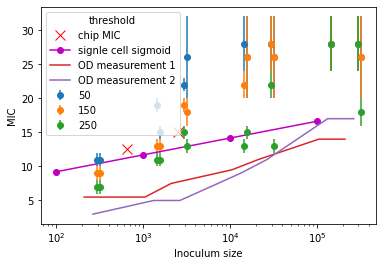

In [272]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
pp = np.array([.1 ** n for n in range(2,6)])
plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'mo-', label='signle cell sigmoid')
plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 1'), label='OD measurement 1')

plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 2'), label='OD measurement 2')


plt.legend(title='threshold')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

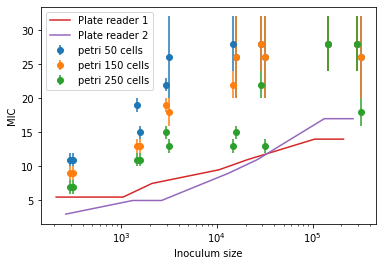

In [286]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=f'petri {thr} cells') for thr in [50,150,250]]
# plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'mo-', label='signle cell sigmoid')
plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 1'), label='Plate reader 1')

plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 2'), label='Plate reader 2')


plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

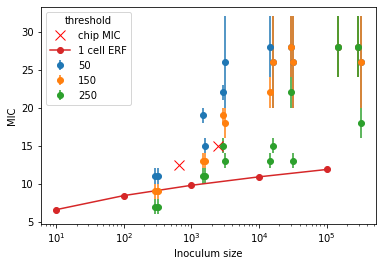

In [309]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
pp = np.array([.1 ** n for n in range(0,6)])
# plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'mo-', label='signle cell sigmoid')
# plt.semilogx(1/pp, ierf_fun(1-pp, 0.4, 6.5), 'co-', label='5 cell ERF')
plt.semilogx(1/pp, ierf_fun(1-pp, *eopt), 'o-', label='1 cell ERF')
plt.legend(title='threshold')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

<ipython-input-20-588085951f23>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (np.log(1 / prob ** (1/cell_number) - 1) - sig_params[1]) / sig_params[0]


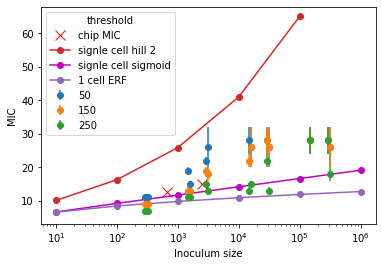

In [308]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_counts.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

pp = np.array([.1 ** n for n in range(1,6)])
plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
pp = np.array([.1 ** n for n in range(0,7)])
plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'mo-', label='signle cell sigmoid')
# plt.semilogx(1/pp, ierf_fun(1-pp, 0.4, 6.5), 'co-', label='5 cell ERF')
plt.semilogx(1/pp, ierf_fun(1-pp, *eopt), 'o-', label='1 cell ERF')
plt.legend(title='threshold')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

In [227]:
petri_diff_thr = pd.read_excel('MIC (count) (different threshold).xlsx', skiprows=3)
petri_diff_thr

Experiment  Seuil  Inoculum_size  MIC  SD
0            4     50     317.037037   11   1
1            4     50    1585.185185   15   1
2            4    150    3170.370370   18   2
3            4    150   15851.851852   26   6
4            4    250  158518.518519   13   1
5            4    250  317037.037037   26   2
6            5     50     292.592593   11   1
7            5     50    1462.962963   19   1
8            5    150     292.592593   19   2
9            5    150    1462.962963   22   1
10           5    150   29259.259259   28   4
11           5    250  146296.296296   28   4
12           5    250  292592.592593   28   4

<ipython-input-20-588085951f23>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (np.log(1 / prob ** (1/cell_number) - 1) - sig_params[1]) / sig_params[0]


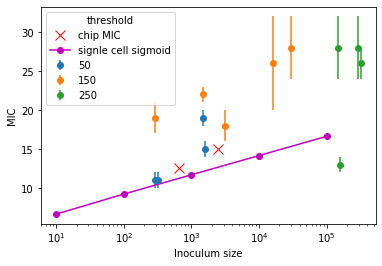

In [228]:
# [plt.plot('Inoculum_size', 'MIC', 'o', data=petri_counts.query(f'Seuil == {thr}'), label=thr) for thr in [50,150,250]]
[plt.errorbar((data := petri_diff_thr.query(f'Seuil == {thr}')).Inoculum_size, data.MIC, xerr=None, yerr=data.SD, fmt='o', label=thr) for thr in [50,150,250]]
plt.plot([650, 2500], [12.5, 15], 'rx',ms=10, label='chip MIC')
# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, hopt), 'o-', label='signle cell hill')

# pp = np.array([.1 ** n for n in range(2,6)])
# plt.semilogx(1/pp, get_concentration_from_hill_prob(1-pp, (5, 6.5 ** 5)), 'o-', label='signle cell hill 2')
pp = np.array([.1 ** n for n in range(0,6)])
plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'mo-', label='signle cell sigmoid')

plt.legend(title='threshold')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Inoculum size')
plt.ylabel('MIC')
plt.show()

In [43]:
275.69453448 ** (1/4)

4.0748069584822675

In [116]:
type(norm_q)

pandas.core.series.Series

array([-0.9337718 ,  4.00943316])

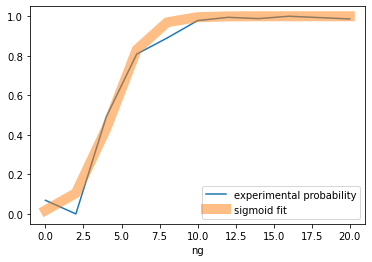

In [19]:
fig,ax = plt.subplots()
popt = fit_sigmoid(norm_q, ax)
popt

In [20]:
def get_sigmoid_mid(cell_number, prob=.5, sig_params=popt ):
    return (np.log(1 / prob ** (1/cell_number) - 1) - sig_params[1]) / sig_params[0]

def get_hill_mid(cell_number, prob=.5, params=hopt, root_power=1):
    alpha = prob ** (cell_number**(-1/root_power))
    return (alpha * hopt[1] / (1 - alpha)) ** (1/hopt[0])

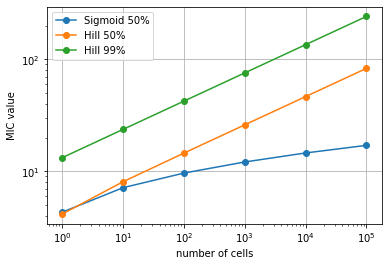

In [23]:
r = np.array([10 ** n for n in range(6)])

# plt.semilogx(r, get_sigmoid_mid(r,.99), 'o-', label='sig 99%')
plt.semilogx(r, get_sigmoid_mid(r), 'o-', label='Sigmoid 50%')
plt.semilogx(r, get_hill_mid(r), 'o-', label='Hill 50%')
plt.semilogx(r, get_hill_mid(r, prob=.99), 'o-', label='Hill 99%')
# plt.semilogx(r, get_hill_mid(r, root_power=3), 'o-', label='Hill 50%, root3 growth')
# plt.semilogx(r, get_hill_mid(r, m=100), 'o-', label='Hill 50%, 1% scale')
# plt.semilogx(r, get_hill_mid(r, m=500), 'o-', label='Hill 50%, 1/500 scale')

# plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 1'), label='96 wells experiment 1')

# plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 2'), label='96 wells experiment 2')


plt.yscale('log')
plt.grid()

plt.xlabel('number of cells')
plt.ylabel('MIC value')
plt.legend()
plt.show()

In [152]:
mic96 = pd.read_csv('/home/aaristov/Multicell1/Lena/Data/20210217_96wells/MIC.csv', header=0, dtype='f')
mic96

Experiment  Inoculum_size   MIC   SD
0          1.0          210.0   5.5  0.5
1          1.0         1051.0   5.5  0.5
2          1.0         2103.0   7.5  0.5
3          1.0        10518.0   9.5  0.5
4          1.0        21037.0  11.0  1.0
5          1.0       105185.0  14.0  2.0
6          1.0       210370.0  14.0  2.0
7          2.0          265.0   3.0  1.0
8          2.0         1325.0   5.0  1.0
9          2.0         2651.0   5.0  1.0
10         2.0        13259.0   9.0  1.0
11         2.0        26518.0  11.0  1.0
12         2.0       132592.0  17.0  1.0
13         2.0       265185.0  17.0  1.0

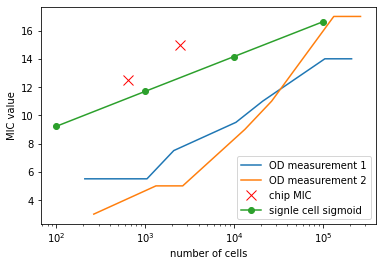

In [221]:
plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 1'), label='OD measurement 1')

plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 2'), label='OD measurement 2')


plt.xscale('log')
# plt.yscale('log')
# r = np.array([10 ** n for n in range(6)])

# plt.semilogx(r, get_sigmoid_mid(r), 'o-', label='sigmoid fit')
plt.plot([650, 2500], [12.5, 15], 'rx', ms=10,  label='chip MIC')

pp = np.array([.1 ** n for n in range(2,6)])
plt.semilogx(1/pp, get_sigmoid_mid(1, 1-pp, popt), 'o-', label='signle cell sigmoid')

plt.xlabel('number of cells')
plt.ylabel('MIC value')
plt.legend()
plt.show()

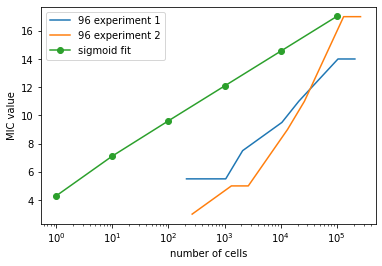

In [235]:
plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 1'), label='96 experiment 1')

plt.plot('Inoculum_size', 'MIC', data=mic96.query('Experiment == 2'), label='96 experiment 2')


plt.xscale('log')
# plt.yscale('log')
r = np.array([10 ** n for n in range(6)])

plt.semilogx(r, get_sigmoid_mid(r), 'o-', label='sigmoid fit')

plt.xlabel('number of cells')
plt.ylabel('MIC value')
plt.legend()
plt.show()

In [49]:
from scipy.stats import gompertz

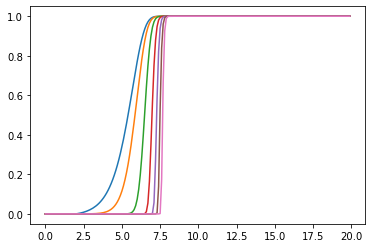

In [77]:
plt.plot((r:=np.arange(0, 20, 0.1)), (g := gompertz.cdf(r, c=.01, scale=.8, loc=2)))

plt.plot((r:=np.arange(0, 20, 0.1)), g**2)
plt.plot((r:=np.arange(0, 20, 0.1)), g**10)
plt.plot((r:=np.arange(0, 20, 0.1)), g**100)
plt.plot((r:=np.arange(0, 20, 0.1)), g**1000)
plt.plot((r:=np.arange(0, 20, 0.1)), g**10000)
plt.plot((r:=np.arange(0, 20, 0.1)), g**100000)



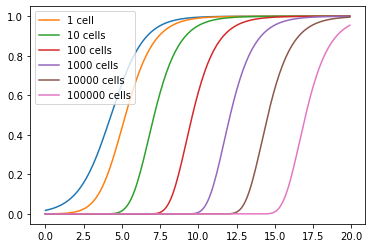

In [241]:
plt.plot((r:=np.arange(0, 20, 0.1)), (g := sigmoid(r, *popt)))

plt.plot((r), g**2, label='1 cell')
plt.plot((r), g**10, label='10 cells')
plt.plot((r), g**100, label='100 cells')
plt.plot((r), g**1000, label='1000 cells')
plt.plot((r), g**10000, label='10000 cells')
plt.plot((r), g**100000, label='100000 cells')
plt.legend()


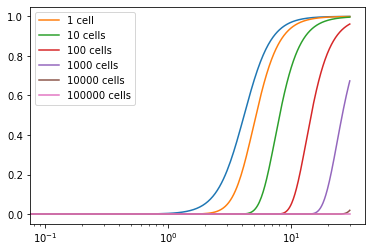

In [305]:
plt.plot((r:=np.arange(0, 30, 0.1)), (g := hill(r, *hopt)))

plt.plot((r), g**2, label='1 cell')
plt.plot((r), g**10, label='10 cells')
plt.plot((r), g**100, label='100 cells')
plt.plot((r), g**1000, label='1000 cells')
plt.plot((r), g**10000, label='10000 cells')
plt.plot((r), g**100000, label='100000 cells')
plt.legend()

plt.xscale('log')

In [324]:
def tissue_responce(A, EC50, Hill):
    return 1 / (1 + (EC50 / A) ** Hill)

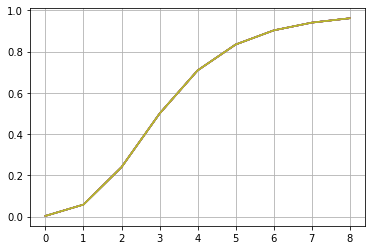

In [329]:
plt.plot([[tissue_responce(AB, 4, 4) for n_cells in range (1, 10)] for AB in range(1,10)])
plt.grid()
plt.show()

In [59]:
control = df18.query('ng == 0')

In [60]:
control

label  mean_intensity  max_intensity  ng  positive
2505      1        7.358730            587   0      True
2506      2        4.029926            380   0      True
2507      3        6.217123            410   0      True
2508      4       -0.346298             22   0     False
2509      5       -0.387190             21   0     False
...     ...             ...            ...  ..       ...
3001    497        5.217308           1022   0      True
3002    498        3.710973            312   0      True
3003    499        5.893065            312   0      True
3004    500        2.557253            203   0      True
3005    501       -0.025532             39   0     False

[501 rows x 5 columns]

In [61]:
lam = -np.log(len(control.query('positive == False')) / len(control))
lam

1.4291143583028187

In [99]:
def get_p(df, ng, lam):
    '''
    Calculates probability to survive for a given concentration `ng`
    df: DataFrame with columns: 'ng':int, 'positive':bool
    ng: value of concentration
    lam: poisson parameter extracated from the control or elsewhere
    '''
    subset = df.query(f'ng == {ng}')
    Ntot = len(subset)
    Nneg = len(subset.query('positive == False'))
    p = - np.log(Nneg/Ntot) / lam
    return p

def get_all_p(df, positive_col='positive', concentration_col='ng'):
    
    lam = get_p(df, 0, 1)
    print(f'lambda from control: {lam:.2f}')
    ngs = sorted(df.loc[:, concentration_col].unique())
    return pd.DataFrame([{'ng': ng, 'p': (p := get_p(df, ng, lam)), 'q': 1-p} for ng in ngs])
#     print (ngs)

In [100]:
get_all_p(df18)

lambda from control: 1.43


ng         p         q
0   0  1.000000  0.000000
1   2  1.100133 -0.100133
2   4  0.277461  0.722539
3   6  0.050675  0.949325
4   8  0.091643  0.908357
5  10  0.031422  0.968578
6  12  0.002799  0.997201
7  14  0.008431  0.991569
8  16 -0.000000  1.000000
9  20  0.005609  0.994391

lambda from control: 1.10


<ipython-input-51-fcef245672c1>:1: RuntimeWarning: Second argument 'p' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot('ng', 'p', data=get_all_p(df18))


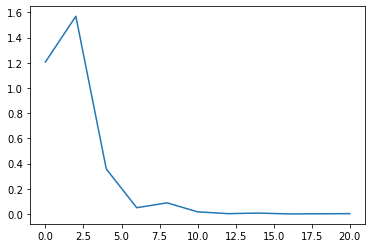

In [51]:
plt.plot('ng', 'p', data=get_all_p(df18))

In [42]:
get_p(df18, 2, lam)

1.5700425959435167

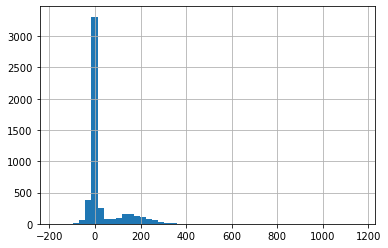

In [88]:
df.mean_intensity.hist(bins=50)

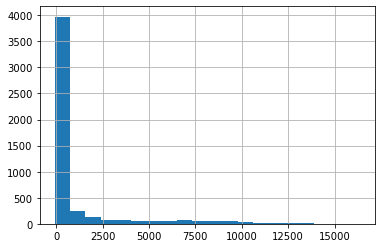

In [89]:
df.max_intensity.hist(bins=20)

In [94]:
os.path.join(os.path.dirname(path5), 'intensities.csv')

'/home/aaristov/Multicell1/Lena/Data/20210205-MIC-overnight/tifs/intensities.csv'

In [95]:
import os

csv_path = os.path.join(os.path.dirname(path5), 'intensities.csv')
df.to_csv(csv_path)